In [5]:
import json
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import sys
import pandas as pd
import pickle
import time



%matplotlib inline

First, load the network

In [3]:
network = pickle.load(open('./output/ON_review_network.txt'))


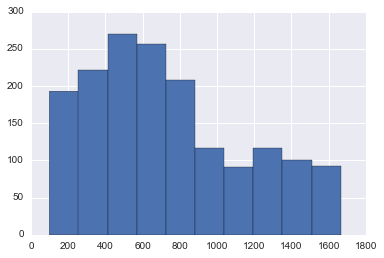

In [4]:
degree_sequence=sorted(nx.degree(network).values()) 
dmax= max(degree_sequence)
h,bins,patches = plt.hist(degree_sequence)

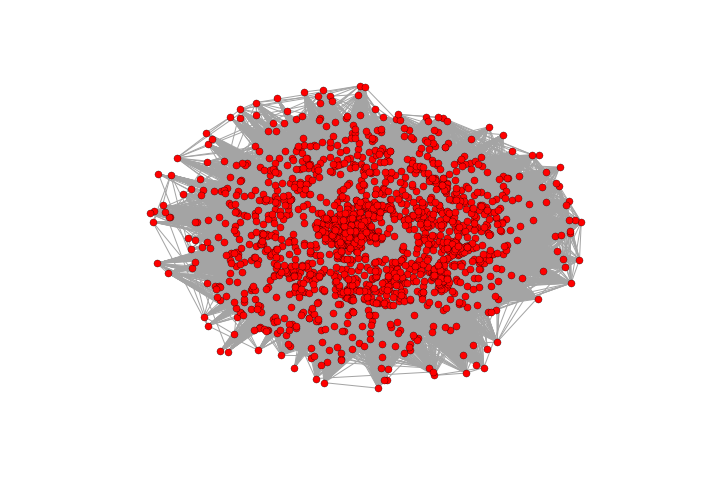

In [6]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(network, edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

In [24]:
def get_prediction(user_id, business_id, review_df):
    review_df = review_df[review_df['BusinessId']==business_id]
    allRatings = []
    friendsRatings = []
    for i in range (len(review_df)):
        stars = review_df.iloc[i].Stars
        allRatings.append(stars)
        if review_df.iloc[i].UserId in friends_list[user_id]:
            friendsRatings.append(stars)
    if allRatings:
        globalAverage = sum(allRatings) / len(allRatings)
    if friendsRatings:
        friendsAverage = sum(friendsRatings) / len(friendsRatings)
        return ((.7*globalAverage)+(.3*friendsAverage))
    if allRatings:
        return globalAverage
    else:
        return None


In [20]:
def get_recommendation(user_id, city, n=10):
    rating_list = []
    review_df = pd.read_csv(open('./output/reviews.csv'))
    for business_id in city:
        rating = get_prediction(user_id, business_id, review_df)
        rating_list.append((business_id, rating))
    temp_res = sorted(rating_list, key=lambda tup: tup[1])
    temp_res.reverse()
    return temp_res[:n]

In [21]:
df = pd.read_csv(open('./output/business.csv'))
ON_df = df.business_id[df['state'] == 'ON']
ON_businesses = ON_df.tolist()

In [22]:
friends_list = nx.to_dict_of_lists(network)

In [25]:
t1= time.time()
print get_recommendation('bpt8aaamzEe09UxWSrcUVQ', ON_businesses)
print time.time()-t1

[('uNEYV3L3vkRjCzpVzBRBcw', 5), ('kl9uNBM5K6IE1n6Pb7uMMA', 5.0), ('CJLy9HYMZSC2ytQUO1-f7A', 5.0), ('_pmjqKf9iZ6zLPCiLoClYg', 5), ('3iWbq5QqLIgusVI2-PuUgQ', 5.0), ('F45vLhAYr-N4uAJPishm9Q', 5), ('-iErUyidzk-c02Od6GDG2w', 5.0), ('7HVZlM8EtDJE3aXJ3rGE3w', 5.0), ('8U46CxZHRPuGRdnq2dFW4Q', 5.0), ('hYdlasiLgVG_BYTsVKSYnQ', 5)]
48.861000061


In [26]:
t1= time.time()
top_recommendations =  get_recommendation('ncpnPLtl2_Gz8i4gPIIRpw', ON_businesses, 5)
business_df = pd.read_csv(open('./output/business.csv'))
for bus, rating in top_recommendations:
    print business_df[business_df.business_id==bus].name.tolist()[0], rating
    print '========================='
print time.time()-t1

Delta Waterloo 5
Downtown Crepe cafe 5.0
King Fish and Chips 5.0
The Java Garden 5
1001 Nights Shawarma 5.0
48.0730001926
